In [1]:
import numpy as np
import pandas as pd

In [2]:
users = [{"id":0,"name":"Hero"},
        {"id":1,"name":"Dunn"},
        {"id":2,"name":"Sue"},
        {"id":3,"name":"Chi"},
        {"id":4,"name":"Thor"},
        {"id":5,"name":"Clive"},
        {"id":6,"name":"Hicks"},
        {"id":7,"name":"Devin"},
        {"id":8,"name":"Kate"},
        {"id":9,"name":"Klein"}]

In [3]:
type(users)

list

In [4]:
type(users[0])

dict

In [5]:
mydict = {"key":1,"value":"jay"}

In [6]:
type(mydict)

dict

In [7]:
# Friendship Data
friendship_pairs = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
                   (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [8]:
friendship_pairs

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [9]:
type(friendship_pairs[1])

tuple

In [10]:
friendship_pairs[2]

(1, 2)

In [11]:
for x in friendship_pairs:
    print(x[1])

1
2
2
3
3
4
5
6
7
8
8
9


In [12]:
for x in friendship_pairs:
    print(x[0])

0
0
1
1
2
3
4
5
5
6
7
8


In [13]:
friendships = {user["id"]:[] for user in users}

In [14]:

friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [15]:
type(friendships)

dict

In [16]:
for i,j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

In [17]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [18]:
#Let's find the no of friends for different user
def no_friends(user):
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [19]:
total_connections = sum(no_friends(user) for user in users)

In [20]:
total_connections

24

In [21]:
#let's find how many friends does Kate has
no_friends(users[8])

3

In [22]:
no_friends(users[7])

2

In [23]:
num_users = len(users)
avg_connections = total_connections /num_users

In [24]:
avg_connections

2.4

In [25]:
len(users)

10

In [26]:
num_friends_by_id = [(user["id"], no_friends(user)) for user in users]

In [27]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [28]:
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1],reverse=True)

In [29]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [30]:
def foaf_ids_bad(user):
    return [foaf_id 
           for friend_id in friendships[user["id"]]
           for foaf_id in friendships[friend_id]]

In [31]:
print(friendships[0])

[1, 2]


In [32]:
print(friendships[1])

[0, 2, 3]


In [33]:
users[0]

{'id': 0, 'name': 'Hero'}

In [34]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [35]:
from collections import Counter



In [36]:
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(foaf_id for friend_id in friendships[user_id]
                  for foaf_id in friendships[friend_id]
                  if foaf_id != user_id and foaf_id not in friendships[user_id])

In [37]:
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [38]:
print(friends_of_friends(users[1]))

Counter({4: 1})


In [39]:
df = pd.read_csv('data2.csv')

In [40]:
df


,ID,Interests
0,0,Hadoop
1,0,Big Data
2,0,HBase
3,0,Java
4,0,Spark
5,0,Storm
6,0,Cassandra
7,1,NoSQL
8,1,MangoDB
9,1,Cassandra


In [41]:
len(df)

49

In [42]:
mylist = []
for x in range(0,len(df)):
     mylist.append(df.iloc[x])

In [43]:
for x in range(0,len(df)):
    mylist.append(df.iloc[x])

In [44]:
help(df.items)

Help on method items in module pandas.core.frame:

items() -> Iterable[Tuple[Optional[Hashable], pandas.core.series.Series]] method of pandas.core.frame.DataFrame instance
    Iterate over (column name, Series) pairs.
    
    Iterates over the DataFrame columns, returning a tuple with
    the column name and the content as a Series.
    
    Yields
    ------
    label : object
        The column names for the DataFrame being iterated over.
    content : Series
        The column entries belonging to each label, as a Series.
    
    See Also
    --------
    DataFrame.iterrows : Iterate over DataFrame rows as
        (index, Series) pairs.
    DataFrame.itertuples : Iterate over DataFrame rows as namedtuples
        of the values.
    
    Examples
    --------
    >>> df = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
    ...                   'population': [1864, 22000, 80000]},
    ...                   index=['panda', 'polar', 'koala'])
    >>> df
            species   

In [45]:
help(df.iterrows)

Help on method iterrows in module pandas.core.frame:

iterrows() -> Iterable[Tuple[Optional[Hashable], pandas.core.series.Series]] method of pandas.core.frame.DataFrame instance
    Iterate over DataFrame rows as (index, Series) pairs.
    
    Yields
    ------
    index : label or tuple of label
        The index of the row. A tuple for a `MultiIndex`.
    data : Series
        The data of the row as a Series.
    
    it : generator
        A generator that iterates over the rows of the frame.
    
    See Also
    --------
    DataFrame.itertuples : Iterate over DataFrame rows as namedtuples of the values.
    DataFrame.items : Iterate over (column name, Series) pairs.
    
    Notes
    -----
    1. Because ``iterrows`` returns a Series for each row,
       it does **not** preserve dtypes across the rows (dtypes are
       preserved across columns for DataFrames). For example,
    
       >>> df = pd.DataFrame([[1, 1.5]], columns=['int', 'float'])
       >>> row = next(df.iterrows

In [46]:
mylist = []
for x in df.itertuples(index=False):
    mylist.append((x[0],x[1]))

In [47]:
mylist

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MangoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'Scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'Programming Languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'Scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'aritificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [48]:
# we can use the data mylist to find common interests
def data_scientists_who_like(target_interest):
    return [user_id for user_id,user_interest in mylist
           if user_interest == target_interest]

In [49]:
from collections import defaultdict
#initiliazing default dictionery 
user_ids_by_interest = defaultdict(list)

In [50]:
type(user_ids_by_interest)

collections.defaultdict

In [51]:
for user_id,interest in mylist:
    user_ids_by_interest[interest].append(user_id)

In [52]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MangoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'Scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'Programming Languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [53]:
# another dictonary that maps interests with user id
interests_by_user_id = defaultdict(list)

In [54]:
for user_id,interest in mylist:
    interests_by_user_id[user_id].append(interest)

In [55]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MangoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'Scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'Programming Languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'Scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [56]:
def most_common_interests_with(user):
    return Counter(interested_user_id 
                  for interest in interests_by_user_id[user["id"]]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user["id"])

In [57]:
# Another problem find salary and years experience
salaries_and_tenures = [(83000,8.7),
                       (88000,8.1),
                       (48000,0.7),
                       (76000,6),
                       (69000,6.5),
                       (76000,7.5),
                       (60000,2.5),
                       (83000,10),
                       (48000,1.9),
                       (63000,4.2)]

In [58]:
import seaborn as sns

In [59]:
pd.DataFrame(salaries_and_tenures,columns=['salary','experience'])

,salary,experience
0,83000,8.7
1,88000,8.1
2,48000,0.7
3,76000,6.0
4,69000,6.5
5,76000,7.5
6,60000,2.5
7,83000,10.0
8,48000,1.9
9,63000,4.2


In [60]:
df1 = pd.DataFrame(salaries_and_tenures,columns=['salary','experience'])

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='experience'>

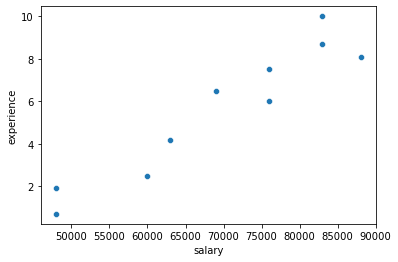

In [61]:
sns.scatterplot(df1.salary,df1.experience)

In [62]:
salary_by_experience = defaultdict(list)

In [63]:
for salary,experience in salaries_and_tenures:
    salary_by_experience[experience].append(salary)

In [64]:
salary_by_experience

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [65]:
salary_by_experience.items()

dict_items([(8.7, [83000]), (8.1, [88000]), (0.7, [48000]), (6, [76000]), (6.5, [69000]), (7.5, [76000]), (2.5, [60000]), (10, [83000]), (1.9, [48000]), (4.2, [63000])])

In [66]:
average_salary_by_experience = {
    experience:sum(salaries) / len(salaries)
    for experience,salaries in salary_by_experience.items()
}

In [67]:
average_salary_by_experience

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [68]:
def experience_bucket(experience):
    if experience < 2:
        return "less than two"
    elif experience < 5:
        return "between two and five"
    else:
        return "more than five"

In [69]:
salary_by_experience_bucket = defaultdict(list)

In [72]:
for salary,experience in salaries_and_tenures:
    bucket = experience_bucket(experience)
    salary_by_experience_bucket[bucket].append(salary)

In [73]:
bucket

'between two and five'

In [74]:
salary_by_experience

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [75]:
average_salary_by_bucket = {
    experience_bucket: sum(salaries) / len(salaries)
    for tenure_bucket,salaries in salary_by_experience_bucket.items()
}

In [76]:
average_salary_by_bucket

{<function __main__.experience_bucket(experience)>: 61500.0}

In [78]:
words_and_counts = Counter(word
                          for user,interest in mylist
                          for word in interest.lower().split())

In [79]:
words_and_counts


Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mangodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'aritificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [80]:
for word,count in words_and_counts.most_common():
    if count > 1:
        print(word,count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [82]:
help(most_common())

NameError: name 'most_common' is not defined